### Data Description:
The "E-commerce Customer Behavior and Purchase Dataset" is a synthetic dataset generated using the Faker Python library. It simulates a comprehensive e-commerce environment, capturing various aspects of customer behavior and purchase history within a digital marketplace. This dataset has been designed for data analysis and predictive modeling in the field of e-commerce. It is suitable for tasks such as customer churn prediction, market basket analysis, recommendation systems, and trend analysis.

#### Column Information:
The dataset contains the following columns:

Customer ID: A unique identifier for each customer.

Customer Name: The name of the customer (generated by Faker).

Customer Age: The age of the customer (generated by Faker).

**Gender**: The gender of the customer (generated by Faker).

Purchase Date: The date of each purchase made by the customer.

Product Category: The category or type of the purchased product.

Product Price: The price of the purchased product.

Quantity: The quantity of the product purchased.

Total Purchase Amount: The total amount spent by the customer in each transaction.

Payment Method: The method of payment used by the customer (e.g., credit card, PayPal).

Returns: Whether the customer returned any products from the order (binary: 0 for no return, 1 for return).

Churn: A binary column indicating whether the customer has churned (0 for retained, 1 for churned).

In [1]:
import pandas as pd
df1 = pd.read_csv(r"C:\Users\USER\Desktop\ALL MY TASKS\TSI DATA SCIENCE\Datasets\CSV Datasets\ecommerce_customer_data_large.csv")
df = pd.read_csv(r"C:\Users\USER\Desktop\ALL MY TASKS\TSI DATA SCIENCE\Datasets\CSV Datasets\ecommerce_customer_data_custom_ratios.csv")

In [2]:
import pandas as pd

print(df.shape)
print(df1.shape)

(250000, 13)
(250000, 13)


In [3]:
df.head(10)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1
5,13593,2023-03-07 14:17:42,Home,250,4,575,PayPal,49,1.0,James Grant,49,Female,1
6,13593,2023-04-15 03:02:33,Electronics,73,1,1896,Credit Card,49,0.0,James Grant,49,Female,1
7,13593,2021-03-27 21:23:28,Books,337,2,2937,Cash,49,0.0,James Grant,49,Female,1
8,13593,2020-05-05 20:14:00,Clothing,182,2,3363,PayPal,49,1.0,James Grant,49,Female,1
9,28805,2023-09-13 04:24:00,Electronics,394,2,1993,Credit Card,19,0.0,Jose Collier,19,Male,0


In [4]:
df1.head(10)

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
5,13738,2022-08-25 06:48:33,Home,191,3,3722,Credit Card,27,1.0,Lauren Johnson,27,Female,0
6,13738,2023-07-25 05:17:24,Electronics,205,1,2773,Credit Card,27,NaN,Lauren Johnson,27,Female,0
7,13738,2023-02-05 19:31:48,Books,370,5,1486,Cash,27,1.0,Lauren Johnson,27,Female,0
8,13738,2021-12-21 03:29:05,Home,12,2,2175,Cash,27,NaN,Lauren Johnson,27,Female,0
9,13738,2023-02-09 00:53:14,Electronics,40,4,4327,Cash,27,0.0,Lauren Johnson,27,Female,0


In [5]:
merged_df = pd.merge(df, df1, on='Customer ID', how='inner')

print(merged_df.head())

   Customer ID      Purchase Date_x Product Category_x  Product Price_x  \
0        46251  2020-09-08 09:38:32        Electronics               12   
1        46251  2020-09-08 09:38:32        Electronics               12   
2        46251  2020-09-08 09:38:32        Electronics               12   
3        46251  2020-09-08 09:38:32        Electronics               12   
4        46251  2020-09-08 09:38:32        Electronics               12   

   Quantity_x  Total Purchase Amount_x Payment Method_x  Customer Age_x  \
0           3                      740      Credit Card              37   
1           3                      740      Credit Card              37   
2           3                      740      Credit Card              37   
3           3                      740      Credit Card              37   
4           3                      740      Credit Card              37   

   Returns_x      Customer Name_x  ...  Product Price_y Quantity_y  \
0        0.0  Christine Hern

In [6]:
merged_df.shape

(1248483, 25)

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [8]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

In [9]:
members = ["Jose","Anne","Idah"]
for index, member in enumerate(members):
    print(index)
    print(member)

0
Jose
1
Anne
2
Idah


In [10]:
def map_column_to_int(df, column_name):
    # Create a dictionary to map non-integer values to integers
    category_mapping = {category: idx for idx, category in enumerate(df[column_name].unique()) if not isinstance(category, int)}

    # Function to map or retain integer
    def map_or_retain(value):
        if isinstance(value, int):
            return value
        return category_mapping[value]

    # Apply the function to the specified column
    df[column_name] = df[column_name].apply(map_or_retain)

# Apply the mapping function to multiple attributes
attributes = ['Product Category', 'Payment Method','Gender']
for attribute in attributes:
    map_column_to_int(df, attribute)

print(df[['Product Category', 'Payment Method','Gender']])

        Product Category  Payment Method  Gender
0                      0               0       0
1                      1               1       0
2                      1               1       0
3                      2               1       0
4                      1               0       1
...                  ...             ...     ...
249995                 2               1       0
249996                 1               0       1
249997                 1               2       0
249998                 3               3       1
249999                 0               2       1

[250000 rows x 3 columns]


In [11]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df[['Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method',
       'Returns', 'Age', 'Gender']].fillna(0)
X = scaler.fit_transform(X)
y = df['Churn']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)



In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(pred_y, y_test)
print("Accuracy Score:", accuracy_score)

Accuracy Score: 0.6676


In [13]:
model = BaggingClassifier()
model.fit(X_train, y_train)

BaggingClassifier()

In [14]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.78388


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc_score
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_accuracy = acc_score(forest_pred, y_test)
print("Accuracy Score:", forest_accuracy)

Accuracy Score: 0.79256


In [20]:
# Define base models
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', make_pipeline(StandardScaler(), LogisticRegression(random_state=42))),
    ('knn', make_pipeline(StandardScaler(), KNeighborsClassifier()))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Create stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
stackY_pred = stacking_clf.predict(X_test)
from sklearn.metrics import accuracy_score as stack_score
stack_accuracy = stack_score(y_test, stackY_pred)
print("Accuracy:", stack_accuracy)


Accuracy: 0.7997


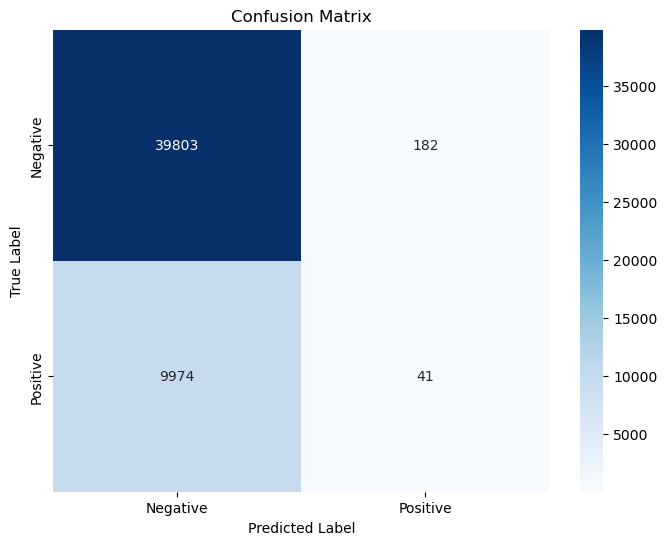

Accuracy: 0.79688


In [25]:
from sklearn.metrics import accuracy_score as blend_accuracy
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Define base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()

# Fit base models on training data
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Make predictions on validation set
rf_pred = rf.predict(X_test)
lr_pred = lr.predict(X_test)
knn_pred = knn.predict(X_test)

# Combine predictions to form a matrix
blending_pred = np.mean([rf_pred, lr_pred, knn_pred], axis=0)

# Convert probabilities to binary predictions
blending_pred_binary = np.where(blending_pred >= 0.5, 1, 0)

# Compute confusion matrix
cm = confusion_matrix(y_test, blending_pred_binary)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Compute evaluation metrics
blend_accuracy_score = blend_accuracy(y_test, blending_pred_binary)

print("Accuracy:", blend_accuracy_score)
